In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Load the processed data

In [3]:
df = pd.read_csv('../data/processed/seattle_ready_03_28_2022.csv')
df.head()

,rent,beds,baths,sqft,fitness_center,air_conditioning,in_unit_washer_dryer,laundry_facilities,car_charging,roof,concierge,pool,garage,income_restrictions,dist_seattle,dist_transit,pets_allowed,zipcode_cluster
0,7.506592,1,1.0,6.234411,1,0,1,0,0,1,0,0,1,0,5.048482,0.029716,1,2
1,7.514800,1,1.0,6.234411,1,0,1,0,0,1,0,0,1,0,5.048482,0.029716,1,2
2,7.506592,1,1.0,6.234411,1,0,1,0,0,1,0,0,1,0,5.048482,0.029716,1,2
3,7.509335,1,1.0,6.340359,1,0,1,0,0,1,0,0,1,0,5.048482,0.029716,1,2
4,7.855932,1,1.0,6.881411,1,0,1,0,0,1,0,0,1,0,5.048482,0.029716,1,2


In [4]:
X = df.drop(['rent'], axis = 1)
y = df['rent']

In [5]:
# split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# 1. Base Model
Construct a linear regression model that only considers rent and distance to downtown as the features. The result from this model will be our base model to compare against every other model that is built. 

In [6]:
# Fit the model 
def regression(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Print results
    print('R squared training set', round(model.score(X_train, y_train)*100, 2))
    print('R squared test set', round(model.score(X_test, y_test)*100, 2))

    # Training data
    pred_train = model.predict(X_train)
    mse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(pred_train)))
    print('RMSE training set', round(mse_train, 2))

    # Test data
    pred_test = model.predict(X_test)
    mse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(pred_test)))
    print('RMSE test set', round(mse_test, 2))
    return model
    
X_base_train = np.array(X_train[['sqft', 'dist_seattle']])
X_base_test = np.array(X_test[['sqft', 'dist_seattle']])

In [7]:
model = regression(X_base_train, y_train, X_base_test, y_test)

R squared training set 62.54
R squared test set 64.59
RMSE training set 795.95
RMSE test set 906.22


# 2. Linear Regression

In [8]:
model = regression(X_train, y_train, X_test, y_test)

R squared training set 68.03
R squared test set 69.71
RMSE training set 751.47
RMSE test set 860.04


# 3. XGBoost

In [9]:
def xgboost(X_train, y_train, X_test, y_test):
    xgb = XGBRegressor()
    xgb.fit(X_train, y_train)

    # Training data
    pred_train = xgb.predict(X_train)
    r2_train = r2_score(np.exp(y_train), np.exp(pred_train))
    mse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(pred_train)))

    # Test data
    pred_test = xgb.predict(X_test)
    r2_test = r2_score(np.exp(y_test), np.exp(pred_test))
    mse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(pred_test)))
    
    # Print results
    print('R squared training set', round(r2_train,2))
    print('R squared test set', round(r2_test,2))
    print('RMSE training set', round(mse_train, 2))
    print('RMSE test set', round(mse_test, 2))
    return xgb

xgb = xgboost(X_train, y_train, X_test, y_test)

R squared training set 0.98
R squared test set 0.91
RMSE training set 144.98
RMSE test set 390.45


# 4. Random Forest

In [10]:
def randomForest(X_train, y_train, X_test, y_test):
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)

    # Training data
    pred_train = rf.predict(X_train)
    r2_train = r2_score(np.exp(y_train), np.exp(pred_train))
    mse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(pred_train)))

    # Test data
    pred_test = rf.predict(X_test)
    r2_test = r2_score(np.exp(y_test), np.exp(pred_test))
    mse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(pred_test)))
    
    # Print results
    print('R squared training set', round(r2_train,2))
    print('R squared test set', round(r2_test,2))
    print('RMSE training set', round(mse_train, 2))
    print('RMSE test set', round(mse_test, 2))
    return rf

rf = randomForest(X_train, y_train, X_test, y_test)

R squared training set 0.98
R squared test set 0.92
RMSE training set 147.0
RMSE test set 380.96


# 5. Comparing the three models

In [11]:
results = {'Actual': np.exp(y_test),
           'LinReg': np.exp(model.predict(X_test)),
           'XGB': np.exp(xgb.predict(X_test)),
           'RF': np.exp(rf.predict(X_test))}

results_df = pd.DataFrame.from_dict(results)
results_df.head(10)

,Actual,LinReg,XGB,RF
2284,2995.0,3079.997020,2878.844238,3179.599744
589,1325.0,1553.023773,1290.227417,1356.335491
84,2420.0,2711.737674,2513.219727,2430.597960
1728,2350.0,2242.379846,2172.628418,2308.330043
2792,2000.0,2247.695982,2075.729004,2187.105774
2855,2358.0,2668.987272,2639.211182,2659.030690
3673,2591.0,2364.915563,2336.187500,2308.899419
1592,2393.0,2442.379690,2437.061279,2500.590658
1010,3064.0,2854.064013,3013.405518,3206.671449
787,2288.0,2100.054649,2186.166260,2059.749780


<Figure size 720x1080 with 0 Axes>

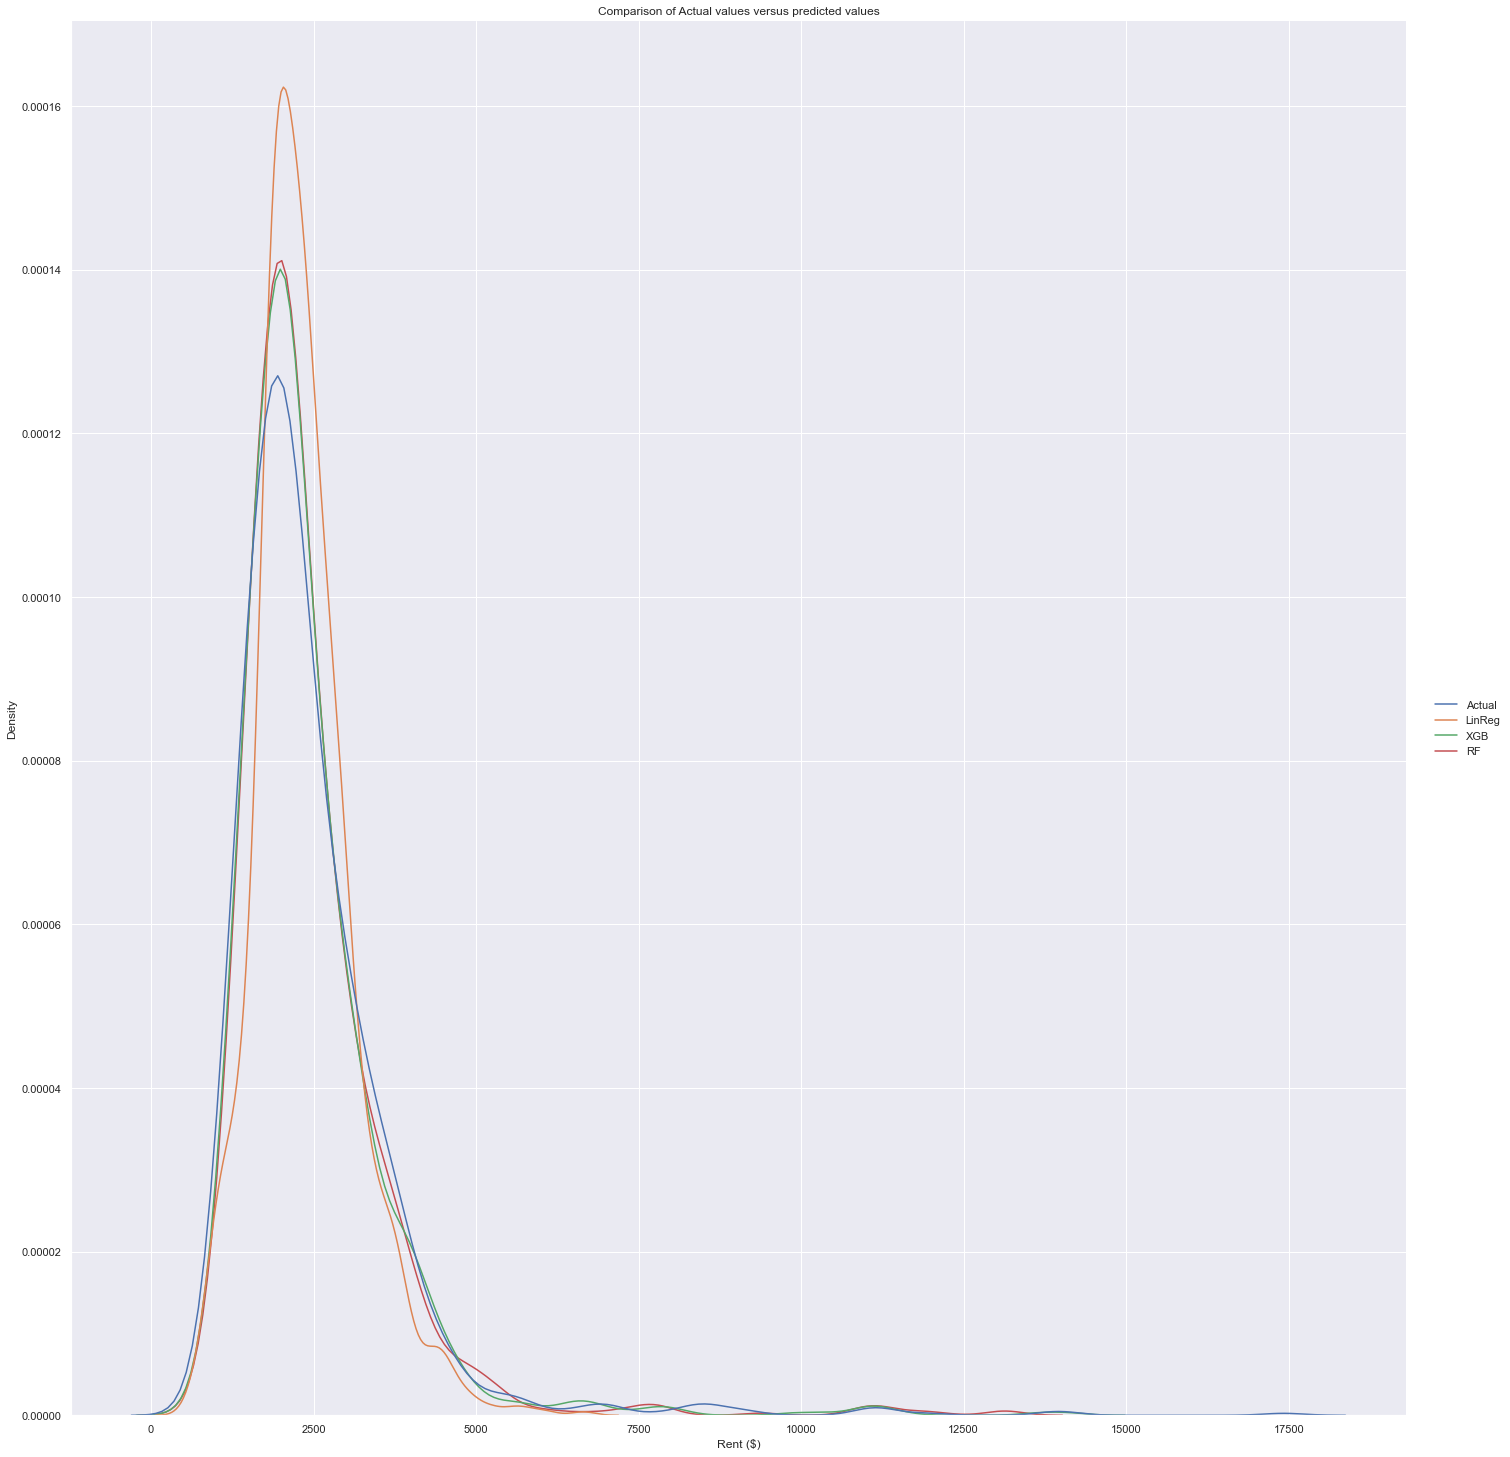

In [12]:
# Plot the results on a distribution 
plt.figure(figsize = (10,15))

ax = sns.displot(data = results_df, kind='kde', height = 20)
plt.title('Comparison of Actual values versus predicted values')
plt.xlabel('Rent ($)')
plt.show()

Both the XGB and Rand Forest models appear to be very similar. This was too be expected as this problem is well suited to tree based models. XGBoost has a slight edge in overall peformance so we will look at tuning the hyperparameters next.

<Figure size 720x1080 with 0 Axes>

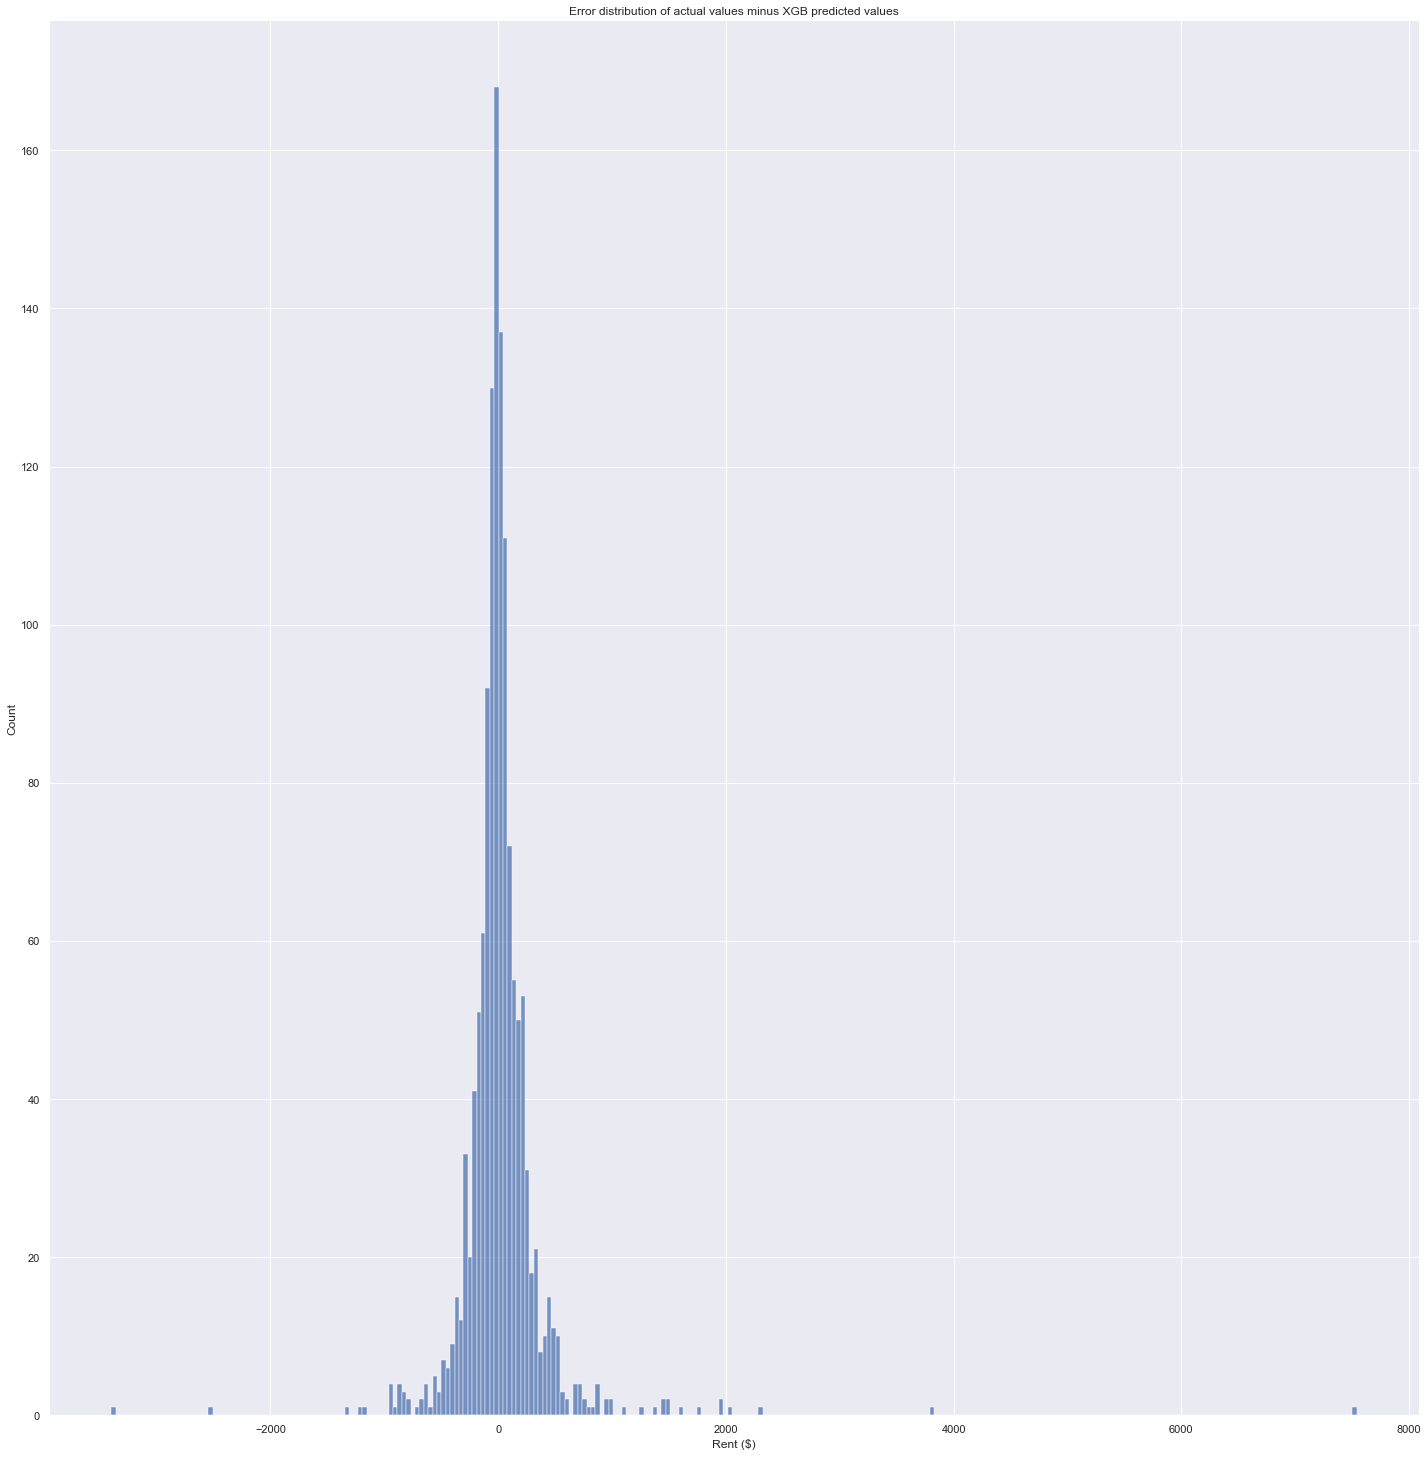

In [13]:
# Plot the results on a distribution 
plt.figure(figsize = (10,15))

ax = sns.displot(data = results_df.Actual-results_df.XGB, height = 20)
plt.title('Error distribution of actual values minus XGB predicted values')
plt.xlabel('Rent ($)')
plt.show()

At first glance, there are quite a few observations that have wildly incorrect predictions. It is worth investigating these data points to understand what happened. A few options could be the case:
* There could be incorrect values for the features,
* These units could be actual outliers that didn't show up in the EDA phase,
* or these could be bargains/overpriced units that are realistic

In [14]:
large_errors = results_df[abs(results_df.Actual-results_df.XGB) > 1200].join(X_test)
large_errors.sqft = np.exp(large_errors.sqft)
large_errors

,Actual,LinReg,XGB,RF,beds,baths,sqft,fitness_center,air_conditioning,in_unit_washer_dryer,...,car_charging,roof,concierge,pool,garage,income_restrictions,dist_seattle,dist_transit,pets_allowed,zipcode_cluster
1338,5900.0,3092.666000,3958.278809,3846.255694,2,2.0,1098.0,0,1,1,...,0,1,0,0,0,0,0.819704,0.079323,1,3
106,3503.0,2033.609555,2015.056030,1865.124620,0,1.0,500.0,1,1,1,...,0,1,0,0,1,0,1.124048,0.098785,1,3
4068,8495.0,4863.122028,6745.329102,5381.714766,2,2.0,1623.0,1,1,1,...,1,1,1,0,1,0,0.783164,0.020024,1,3
586,4000.0,5244.556593,6512.960938,4802.712563,4,3.0,2400.0,0,0,0,...,0,0,0,0,0,0,1.305332,0.068365,1,3
1094,7074.0,4292.052853,5699.894043,5034.632249,2,2.0,1579.0,1,1,1,...,1,0,0,0,1,0,1.045467,0.037504,1,3
1634,5500.0,2776.452176,3188.803223,3237.486630,2,1.0,988.0,0,1,1,...,0,0,0,0,1,0,1.072178,0.034404,0,3
2696,9049.0,5214.129846,7001.341309,5313.099042,2,2.0,1808.0,1,1,1,...,1,1,1,0,1,0,0.631227,0.025914,1,3
1817,17425.0,6650.275220,9883.808594,12032.515569,3,3.0,2592.0,1,1,1,...,1,1,1,1,1,0,1.044869,0.050805,1,3
1705,5295.0,3801.582208,3329.145020,3488.602809,4,2.0,2520.0,0,1,1,...,0,0,0,0,0,0,6.440274,0.405045,1,2
367,7055.0,4568.842520,5564.873047,5712.941812,2,2.0,1346.0,1,1,0,...,0,0,1,1,1,0,0.910103,0.062760,1,3


## Evaluate the Feature Importances

In [15]:
# Extracting feature importances from the randomForest model
feature_importances = ({'Name':[],
                        'Score':[]})

for name, score in zip(X.columns, xgb.feature_importances_):
  feature_importances['Name'].append(name)
  feature_importances['Score'].append(score)

feature_importances = pd.DataFrame(feature_importances).sort_values(['Score'], ascending = False)

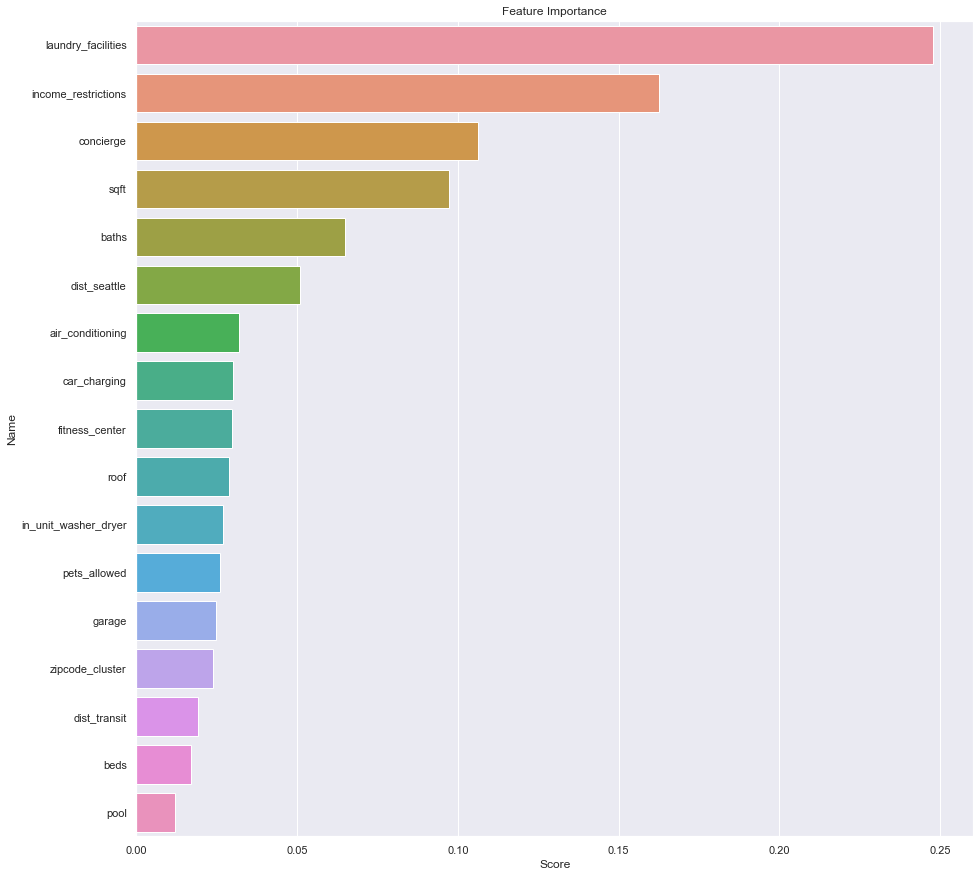

In [16]:
# Plot the feature importances
fig = plt.figure(figsize=(15,15))
sns.barplot(x = 'Score', y = 'Name', data = feature_importances)
plt.title('Feature Importance')
plt.show()

In [25]:
data_pearl = {1:{'bed':1,
              'bath':1, 
              'sqft': np.log(584), 
              'fc': 0, 
              'ac': 0, 
              'wd': 1, 
              'laund': 0,
              'charge': 0, 
              'roof': 0, 
              'concierge': 0, 
              'pool': 0, 
              'garage': 1, 
              'income_restrictions':0, 
              'dist_seattle':1.1,
              'dist_transit':0.03, 
              'pets_allowed':1, 
              'zipcode_cluster': 3}
}

Pearl = pd.DataFrame(data_pearl[1], index=[0])
rent_pearl = np.exp(xgb.predict(Pearl))
rent_pearl

array([1867.0875], dtype=float32)

## Hyperparameter Tuning for XGBoost

In [ ]:
params = {"n_estimators": np.arange(100,1500,250),
"learning_rate": np.arange(0.1,0.3,0.025),
 "max_depth": np.arange(3,10,1),
 "min_child_weight": np.arange(3,20,2),
 "reg_alpha": np.arange(0,1,0.1)}


In [ ]:
regressor=XGBRegressor()

In [ ]:
search = RandomizedSearchCV(regressor, param_distributions=params, cv=7)

In [ ]:
search.fit(X_train,y_train)

In [ ]:
best_params=search.best_params_
best_params

In [ ]:
xgb=XGBRegressor(n_estimators= best_params['n_estimators'], 
                         max_depth= best_params['max_depth'],
                         learning_rate= best_params['learning_rate'],
                         reg_alpha=best_params['reg_alpha'])

xgb.fit(X_train, y_train)

In [ ]:
# Training data
pred_train = xgb.predict(X_train)
r2_train = r2_score(np.exp(y_train), np.exp(pred_train))
mse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(pred_train)))

# Test data
pred_test = xgb.predict(X_test)
r2_test = r2_score(np.exp(y_test), np.exp(pred_test))
mse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(pred_test)))

# Print results
print('R squared training set', round(r2_train,2))
print('R squared test set', round(r2_test,2))
print('RMSE training set', round(mse_train, 2))
print('RMSE test set', round(mse_test, 2))

In [ ]:
from xgboost import plot_tree
plot_tree(xgb)